# **About dataset**
* Dataset name: Bank Marketing Data Set (normalised as availabe at the link below), where all columns are converted into numerical form
* Dataset availabe at: https://github.com/GuansongPang/ADRepository-Anomaly-detection-datasets/blob/main/numerical%20data/DevNet%20datasets/bank-additional-full_normalised.csv
* Orginal Datasset is availabe at: https://archive.ics.uci.edu/ml/datasets/bank+marketing


* Dataset shape : (41188, 63)

# **Applying different statistical measures and presenting on infograph**

In [ ]:
#Import the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.decomposition  import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')

In [ ]:
# fetching the data from github repository
! wget https://raw.githubusercontent.com/GuansongPang/deviation-network/master/dataset/bank-additional-full_normalised.csv

--2022-11-27 16:48:12--  https://raw.githubusercontent.com/GuansongPang/deviation-network/master/dataset/bank-additional-full_normalised.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7151546 (6.8M) [text/plain]
Saving to: ‘bank-additional-full_normalised.csv.4’

bank-additional-ful 100%[===================>]   6.82M  --.-KB/s    in 0.04s   

2022-11-27 16:48:12 (167 MB/s) - ‘bank-additional-full_normalised.csv.4’ saved [7151546/7151546]



In [ ]:
# reading the data
campaign = pd.read_csv('bank-additional-full_normalised.csv')
campaign

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,...,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,0.209877,0,0,0,0,0,0,0,0,0,...,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980730,1.000000,0
1,0.296296,0,0,1,0,0,0,0,0,0,...,0.000000,1,0,0,1.000000,0.484412,0.615063,0.981183,1.000000,0
2,0.246914,1,0,0,0,0,0,0,0,0,...,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735,0
3,0.160494,0,1,0,0,0,0,0,0,0,...,0.142857,0,1,0,0.333333,0.269680,0.192469,0.150759,0.512287,0
4,0.530864,0,0,0,1,0,0,0,0,0,...,0.000000,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.271605,0,0,0,1,0,0,0,0,0,...,0.000000,1,0,0,0.333333,0.269680,0.192469,0.158694,0.512287,0
41184,0.333333,0,0,0,0,0,0,1,0,0,...,0.000000,1,0,0,0.687500,0.389322,0.368201,0.767853,0.877883,1
41185,0.172840,0,0,0,0,1,0,0,0,0,...,0.000000,1,0,0,0.937500,0.698753,0.602510,0.956926,0.859735,0
41186,0.148148,0,0,1,0,0,0,0,0,0,...,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980503,1.000000,0


In [ ]:
campaign.shape

(41188, 63)

In [ ]:
# counts for normal class=0 and anomaly class=1
campaign['class'].value_counts()

0    36548
1     4640
Name: class, dtype: int64

In [ ]:
# data description
campaign.dtypes

age                float64
job=housemaid        int64
job=services         int64
job=admin.           int64
job=blue-collar      int64
                    ...   
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
class                int64
Length: 63, dtype: object

In [ ]:
# identifying duplicate rows
print(f'Duplicate rows in the datsaset :{campaign.duplicated().sum()}\n') 

print('class type of duplicated rows:') 
print(campaign[campaign.duplicated()]['class'].value_counts())



Duplicate rows in the datsaset :12

class type of duplicated rows:
0    11
1     1
Name: class, dtype: int64


In [ ]:
#dropping duplicate rows
campaign=campaign.drop_duplicates()
campaign.shape

(41176, 63)

In [ ]:
campaign['class'].value_counts()

0    36537
1     4639
Name: class, dtype: int64

In [ ]:
# column names in the data
campaign.columns

Index(['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'p

In [ ]:
# renconverting one hot encoding into categorical values for use in further analysis in part (a)
job_cols=['job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student']
marital_cols=['marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown',]
education_cols=['education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate']

default_cols=['default=0',
       'default=unknown', 'default=1']
housing_cols=['housing=0', 'housing=1',
       'housing=unknown', ]
loan_cols=['loan=0', 'loan=1', 'loan=unknown',]

marital_list=[]
education_list=[]
jobs_list=[]
default_list=[]
housing_list=[]
loans_list=[]


for i in range(len(job_cols)):
  for j in range(campaign[job_cols[i]].value_counts()[1]):
    jobs_list.append(job_cols[i][4:])
cat_bank=pd.DataFrame(jobs_list,columns=['jobs'])


for i in range(len(marital_cols)):
  for j in range(campaign[marital_cols[i]].value_counts()[1]):
    marital_list.append(marital_cols[i][8:])
  

for i in range(len(education_cols)):
  for j in range(campaign[education_cols[i]].value_counts()[1]):
    education_list.append(education_cols[i][10:])


for i in range(len(default_cols)):
  for j in range(campaign[default_cols[i]].value_counts()[1]):
    default_list.append(default_cols[i][8:])

for i in range(len(housing_cols)):
  for j in range(campaign[housing_cols[i]].value_counts()[1]):
    housing_list.append(housing_cols[i][8:])

for i in range(len(loan_cols)):
  for j in range(campaign[loan_cols[i]].value_counts()[1]):
    loans_list.append(loan_cols[i][5:])


cat_bank['marriage']=marital_list
cat_bank['education']=education_list
cat_bank['default']=default_list
cat_bank['housing']=housing_list
cat_bank['loan']=loans_list


cat_bank['class']= campaign['class']
cat_bank['age']=campaign['age']
# displaying the data after conversion
cat_bank

,jobs,marriage,education,default,housing,loan,class,age
0,housemaid,married,basic.4y,0,0,0,0.0,0.209877
1,housemaid,married,basic.4y,0,0,0,0.0,0.296296
2,housemaid,married,basic.4y,0,0,0,0.0,0.246914
3,housemaid,married,basic.4y,0,0,0,0.0,0.160494
4,housemaid,married,basic.4y,0,0,0,1.0,0.530864
...,...,...,...,...,...,...,...,...
41171,student,unknown,illiterate,unknown,unknown,unknown,0.0,0.222222
41172,student,unknown,illiterate,unknown,unknown,unknown,0.0,0.222222
41173,student,unknown,illiterate,1,unknown,unknown,0.0,0.086420
41174,student,unknown,illiterate,1,unknown,unknown,0.0,0.333333


# **finding statistical measure: 'mode' for jobs attribute**

In [ ]:
cat_bank['jobs'].mode() 

0    admin.
dtype: object

# **countplot to illustrate mode for jobs attribute**

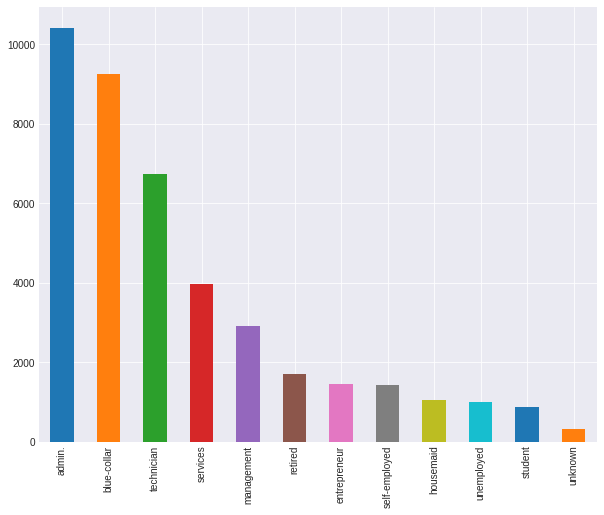

In [ ]:

cat_bank['jobs'].value_counts().plot(kind='bar',figsize=(10, 8),color=sns.color_palette());

# **Inference drawn**
* The statistical computation of the value of mode and the infograph both point to the same value i.e **admin**

# **classwise categorical plot for jobs attribute to show mode value per category**

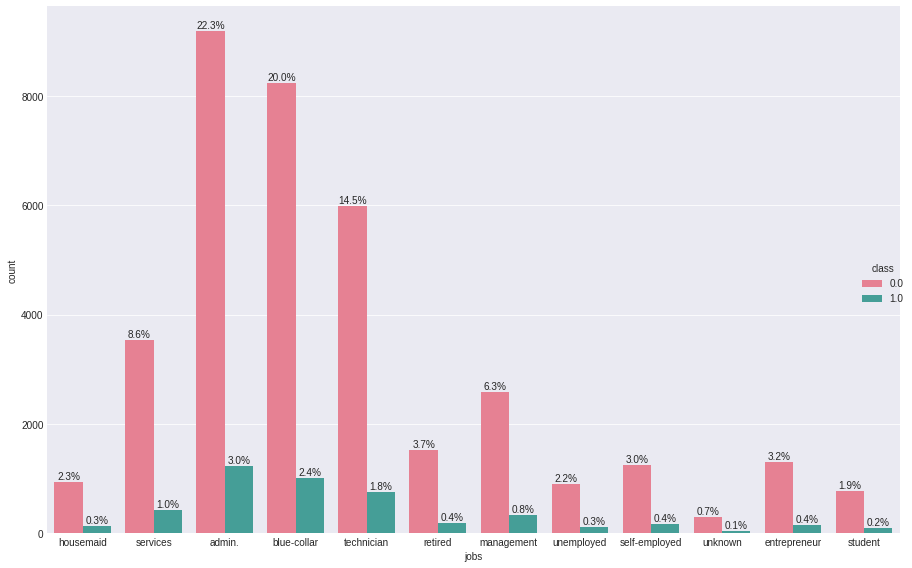

In [ ]:
  
g=sns.catplot(data=cat_bank, x="jobs", kind="count", hue='class', palette="husl",height=8, aspect=12/8)
ax = g.facet_axis(0,0)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
total = len(cat_bank)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()



# **Inference drawn**
* classwise categorical plot for jobs attribute shows admin as the data mode and in admin the class mode is class 0. 

# **finding statistical measure: 'mode' for marriage attribute**

In [ ]:
cat_bank['marriage'].mode() 

0    married
dtype: object

# **countplot to illustrate mode for marriage attribute**

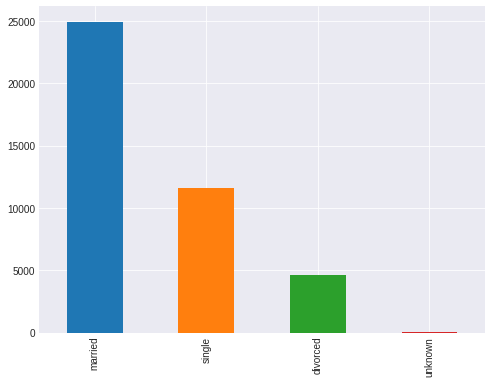

In [ ]:
cat_bank['marriage'].value_counts().plot(kind='bar',figsize=(8, 6),color=sns.color_palette());

# **Inference drawn**
* The statistical computation of the value of mode and the infograph both point to the same value i.e **marriage**

# **classwise categorical plot for marriage attribute to show mode value per category**

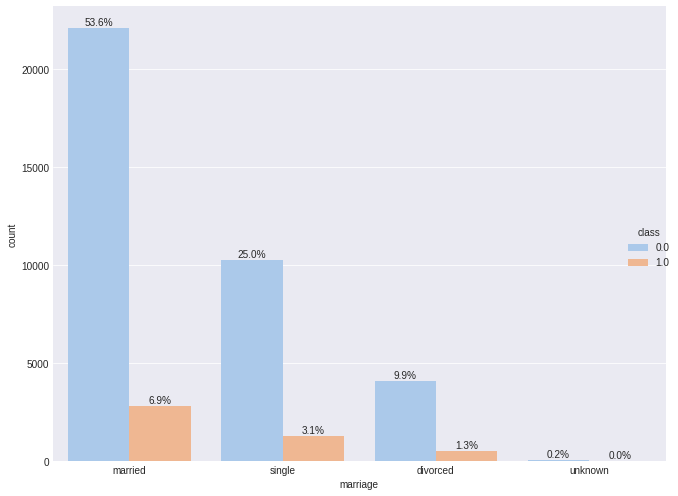

In [ ]:
g=sns.catplot(data=cat_bank, x="marriage", kind="count", hue='class', palette="pastel",height=7, aspect=10/8)

ax = g.facet_axis(0,0)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
total = len(cat_bank)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()



# **Inference drawn**
* classwise categorical plot for marriage attribute shows married as the data mode and in married the class mode is class 0. 

# **finding statistical measure: 'mode' for education attribute**

In [ ]:
cat_bank['education'].mode() 

0    university.degree
dtype: object

# **countplot to illustrate mode for education attribute**

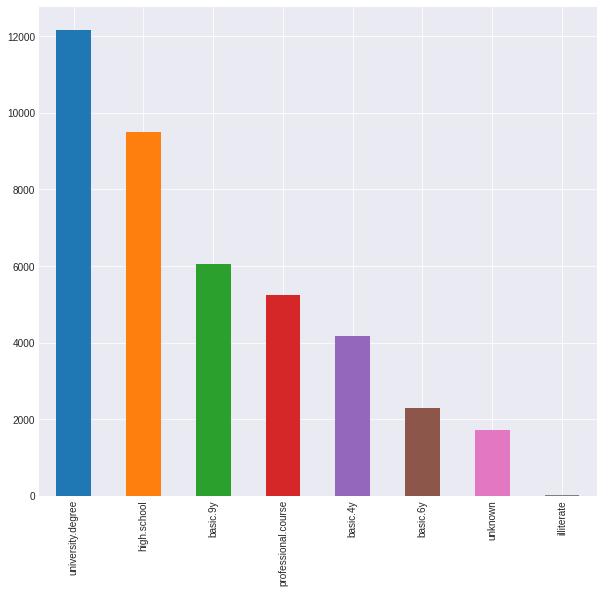

In [ ]:
cat_bank['education'].value_counts().plot(kind='bar',figsize=(10, 9),color=sns.color_palette());

# **Inference drawn**
* The statistical computation of the value of mode and the infograph both point to the same value i.e **university.degree**

# **classwise categorical plot for education attribute to show mode value per category** 

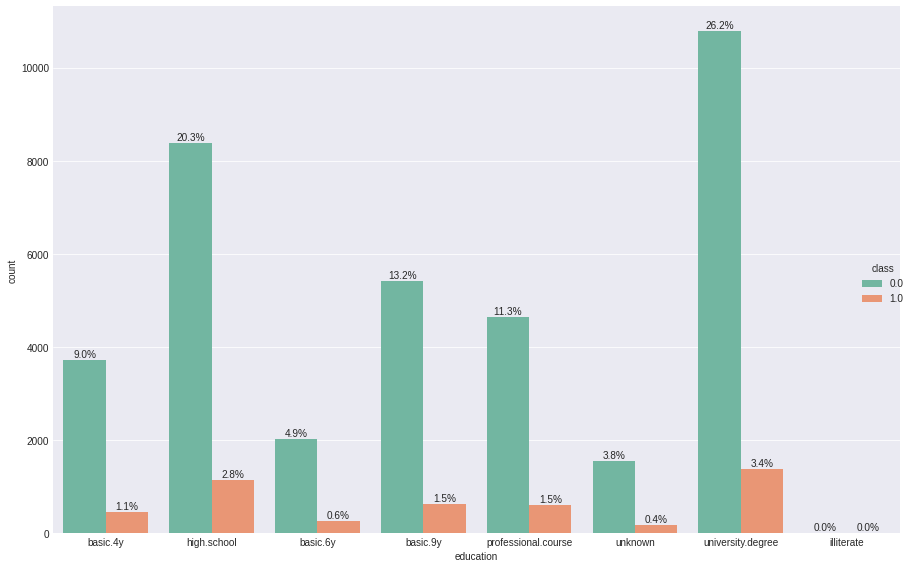

In [ ]:
g=sns.catplot(data=cat_bank, x="education", kind="count", hue='class', palette="Set2",height=8, aspect=12/8)
ax = g.facet_axis(0,0)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
total = len(cat_bank)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()




# **Inference drawn**
* classwise categorical plot for education attribute shows university.degree as the data mode and in university.degree the class mode is class 0.

# **Histogram plot for age attribute**

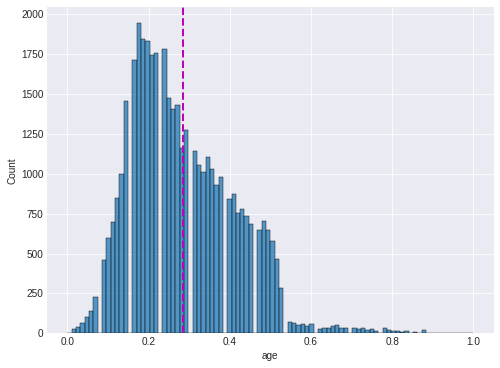

In [ ]:

plt.figure(figsize=(8,6))
g=sns.histplot(data=campaign, x="age")
g.axvline(x=campaign['age'].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.show()

# **Inference drawn**
* Age attribute follows a slightly skewed normal distribution. 

# **Overall class distribution**

In [ ]:
campaign['class'].value_counts()

0    36537
1     4639
Name: class, dtype: int64

# **Infograph for class distribution**

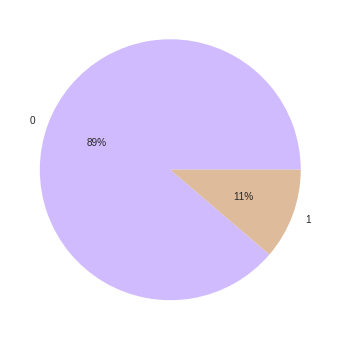

In [ ]:
plt.style.use('seaborn-darkgrid')
colors = sns.color_palette('pastel')[4:6]
# plotting data on chart
plt.figure(figsize=(8,6))
plt.pie(campaign['class'].value_counts().values, labels=campaign['class'].value_counts().index,colors=colors,autopct='%.0f%%')
  
# displaying chart
plt.show()

# **Inference drawn**
* Normal class is class 0 meaning non subscription of term deposit.
* Anomaly class is class 1 meaning subscription of term deposit.

# **statistical description of the dataset** 

In [ ]:
campaign.describe()

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,...,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.284244,0.025743,0.096343,0.253036,0.224718,0.163663,0.041723,0.071012,0.024626,0.034510,...,0.024716,0.863391,0.103264,0.033345,0.725400,0.535744,0.430843,0.677237,0.769130,0.112663
std,0.128650,0.158370,0.295064,0.434757,0.417402,0.369974,0.199959,0.256848,0.154984,0.182538,...,0.070709,0.343438,0.304307,0.179537,0.327267,0.225580,0.193634,0.393207,0.273162,0.316184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287,0.000000
50%,0.259259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735,0.000000
75%,0.370370,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Correlation Analysis**

In [ ]:
#computing correlations
c = campaign[campaign.columns[:-1]].corr()

s = c.unstack()
so = s.sort_values(kind="quicksort")
so=so[::-1]

In [ ]:
print(f'Top Positive correlations')
# entries befor ethe index 64 features had correlation of one
# because each feature was correlated with itself
so[64:90]

Top Positive correlations


euribor3m                      emp.var.rate                     0.972244
emp.var.rate                   euribor3m                        0.972244
euribor3m                      nr.employed                      0.945146
nr.employed                    euribor3m                        0.945146
                               emp.var.rate                     0.906949
emp.var.rate                   nr.employed                      0.906949
cons.price.idx                 emp.var.rate                     0.775294
emp.var.rate                   cons.price.idx                   0.775294
cons.price.idx                 euribor3m                        0.688180
euribor3m                      cons.price.idx                   0.688180
poutcome=failure               previous                         0.682597
previous                       poutcome=failure                 0.682597
poutcome=success               previous                         0.524038
previous                       poutcome=success    

In [ ]:
print(f'Top Negative correlations')
so[-20:]

Top Negative correlations


nr.employed           previous               -0.501411
previous              nr.employed            -0.501411
pdays                 previous               -0.587508
previous              pdays                  -0.587508
cons.price.idx        contact=cellular       -0.591596
contact=cellular      cons.price.idx         -0.591596
marital=married       marital=single         -0.773766
marital=single        marital=married        -0.773766
poutcome=nonexistent  poutcome=failure       -0.853114
poutcome=failure      poutcome=nonexistent   -0.853114
poutcome=nonexistent  previous               -0.878771
previous              poutcome=nonexistent   -0.878771
loan=1                loan=0                 -0.915836
loan=0                loan=1                 -0.915836
poutcome=success      pdays                  -0.950700
pdays                 poutcome=success       -0.950700
housing=1             housing=0              -0.952805
housing=0             housing=1              -0.952805
default=0 

# **Heatmap showing correlations**

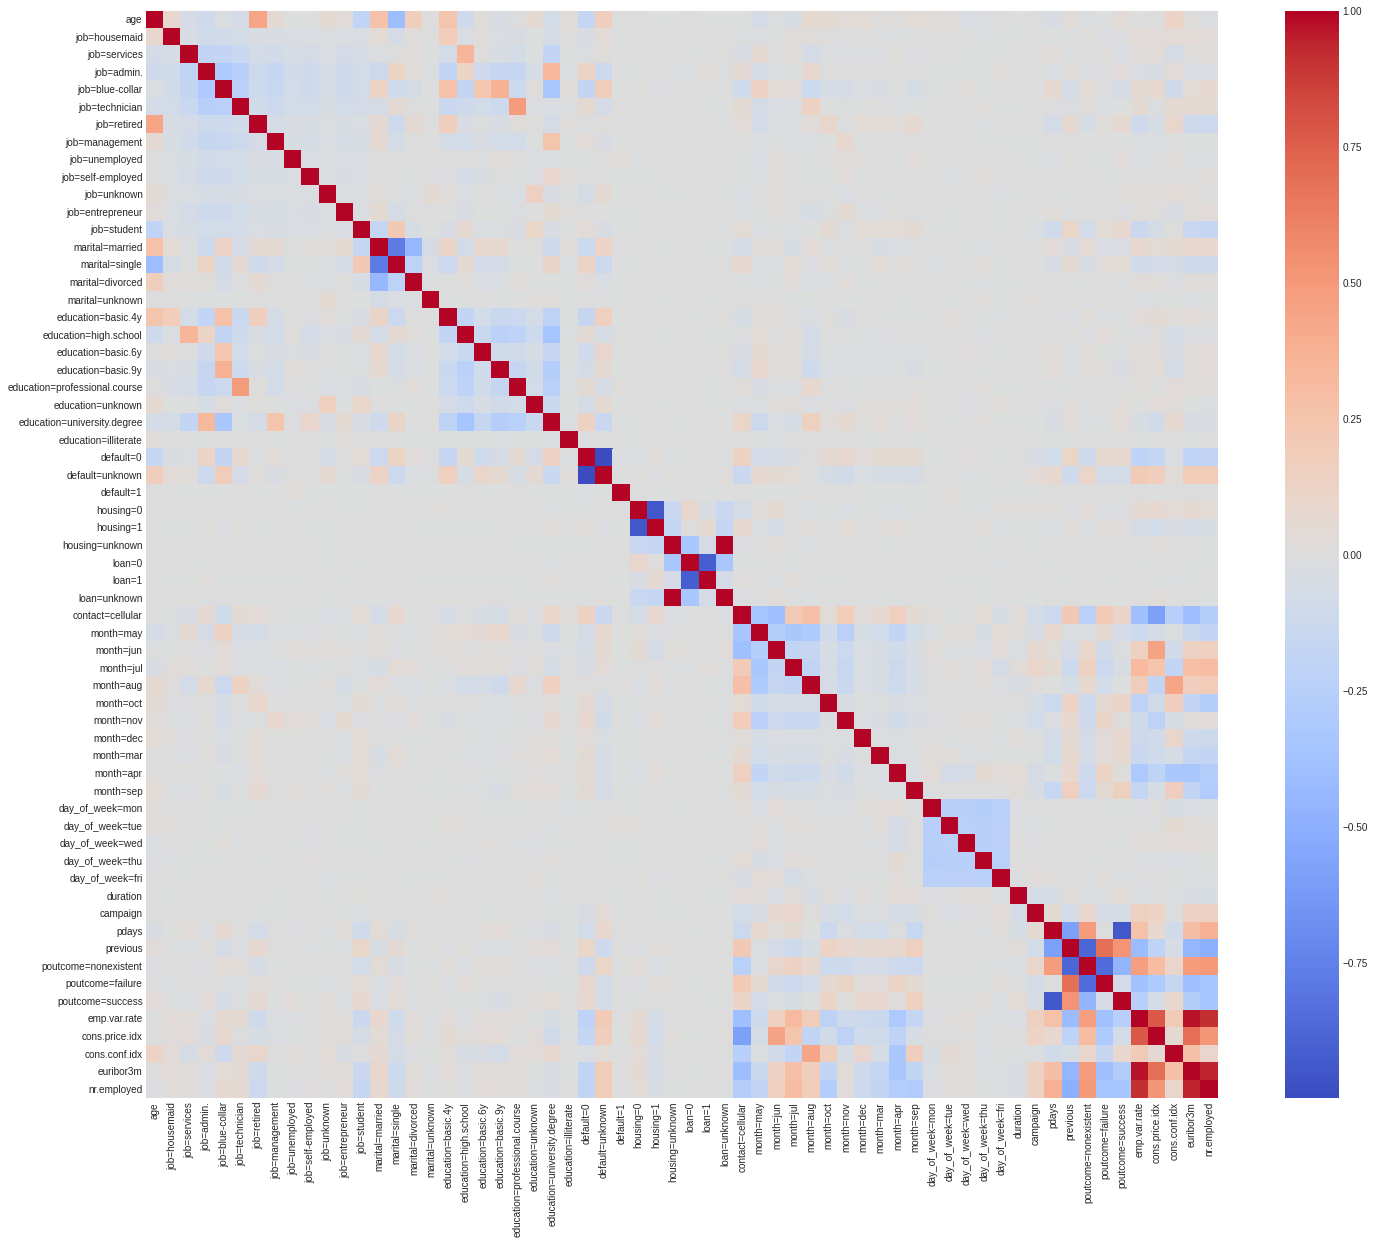

In [ ]:
plt.figure(figsize=(24,20))
sns.heatmap(campaign[campaign.columns[:-1]].corr(), yticklabels='auto', cmap='coolwarm')
plt.show()

# **Inference drawn**
* It can be seen that some of the attributes are highly positively correlated with each other for ex:
  * **correlation value: 0.972244** between 'euribor3m' and 'emp.varrate'   
                       
  * **correlation value: 0.945146** between 'euribor3m' and 'nr.employed'
* It can be seen that some of the attributes are highly negatively correlated with each other for ex:
  * **correlation value: -0.950700** between 'poutcome=success' and 'pdays'                  
  * **correlation value: -0.999780** between 'default=unknown' and 'default=0'  

# **Training the baseline model on the data**
* # We have chosen the KNN classifier as the baseline model

In [ ]:

feature_cols=campaign.columns[:-1]
target_col=campaign.columns[-1]
X=campaign[feature_cols]
y= campaign[target_col]

# Choosing stratified samples for making train & test data due to data imbalance 
X_train,X_test,y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)

In [ ]:
# Illustrating the stratified samples
print(y_train.value_counts())
print('------------------')
print(y_train.value_counts(normalize=True)*100)

0    21922
1     2783
Name: class, dtype: int64
------------------
0    88.735074
1    11.264926
Name: class, dtype: float64


In [ ]:
print(y_test.value_counts())
print('------------------')
print(y_test.value_counts(normalize=True)*100)

0    14615
1     1856
Name: class, dtype: int64
------------------
0    88.73171
1    11.26829
Name: class, dtype: float64


In [ ]:
# performance of the baseline KNN model
# using default hyper-parameter settings i.e n_neighbors=5
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
acc_knn=accuracy_score(y_pred_knn,y_test)

print('-------Accuracy of the baseline model----------\n')
print(f'KNN: {acc_knn}')


-------Accuracy of the baseline model----------

KNN: 0.8920526986825329


# **Dimensionality reduction using PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize

# normalizing feature vectors for better illustration
X_std=StandardScaler().fit_transform(X)
X_nrm=normalize(X_std)

% of variance retained by various componets

[10.4 18.5 25.9 32.1 37.3 42.  46.5 50.8 54.7 58.2 61.7 65.  68.3 71.4
 74.  76.5 78.9 81.1 83.1 84.9 86.4 87.7 89.  90.2 91.3 92.3 93.2 94.
 94.8 95.6 96.2 96.8 97.3 97.7 98.1 98.4 98.7 99.  99.2 99.4 99.5 99.6
 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7
 99.7 99.7 99.7 99.7 99.7 99.7]


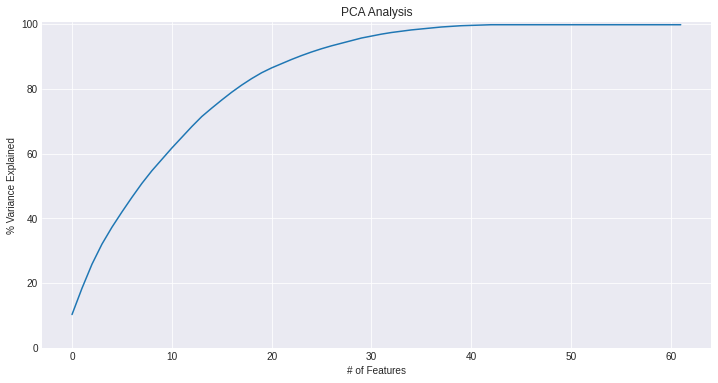

In [ ]:
# Infograph showing the varaince retained by PCA without normalization 
pca=PCA(n_components=X.shape[1])
pca.fit(X)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)

plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
print('% of variance retained by various componets')
plt.plot(var)
print("")
print(var)

% of variance retained by various componets

[  9.1  15.4  20.1  24.4  28.4  32.3  35.9  39.5  43.   46.2  49.1  51.8
  54.5  57.2  59.8  62.3  64.8  67.2  69.5  71.7  73.7  75.5  77.2  78.9
  80.5  82.1  83.6  85.1  86.5  87.9  89.2  90.5  91.8  93.   94.   94.9
  95.7  96.5  97.3  98.   98.6  99.1  99.4  99.7 100.  100.2 100.3 100.3
 100.3 100.3 100.3 100.3 100.3 100.3 100.3 100.3 100.3 100.3 100.3 100.3
 100.3 100.3]


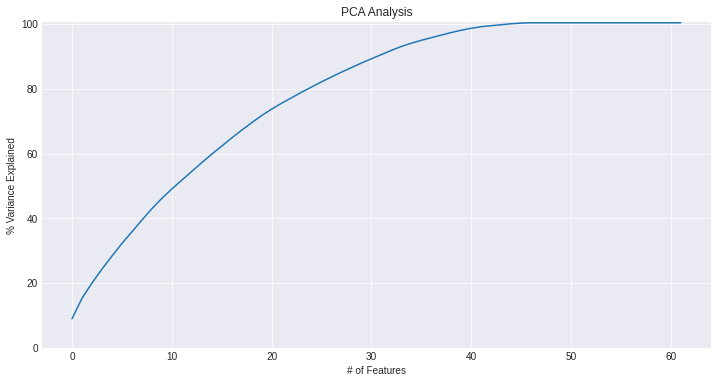

In [ ]:
# Infograph showing the varaince retained by PCA with normalization for better clarity
pca=PCA(n_components=X.shape[1])
pca.fit(X_nrm)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)

plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
print('% of variance retained by various componets')
plt.plot(var)
print("")
print(var)

# **Inference drawn**
* The computations shows that to represent 80% or more data variability we may have to choose PCA features ranging from 25 upto 42.

In [ ]:
knn=[]

variance_retained=[60,70, 80,90,99]
for variance in variance_retained:
  components_pca=np.argmax(var>=variance)+1
  pca_=PCA(n_components=components_pca)
  X_pca=pca_.fit_transform(X_nrm)
  print(f'Shape of original dataset:{X_nrm.shape}')
  print(f'Shape of dataset after after Dimesnionality Reduction with {variance}% variance retained: {X_pca.shape}\n')

  print('-------Accuracy on BASELINE KNN model-----\n')

  print(f'KNN : {acc_knn}\n')


  X_train_pca,X_test_pca,y_train_pca, y_test_pca=train_test_split(X_pca, y, test_size=0.4, random_state=42,stratify=y)

  knn_clf_pca = KNeighborsClassifier()
  knn_clf_pca.fit(X_train_pca,y_train_pca)
  y_pred_knn_pca=knn_clf_pca.predict(X_test_pca)
  acc_knn_pca=accuracy_score(y_pred_knn_pca,y_test_pca)
  knn.append(acc_knn_pca)


  print(f'-------Accuracy after dimensionality reduction with PCA {variance}% (variance retained)----------\n')
  print(f'KNN : {acc_knn_pca}')
  print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n")



Shape of original dataset:(41176, 62)
Shape of dataset after after Dimesnionality Reduction with 60% variance retained: (41176, 16)

-------Accuracy on BASELINE KNN model-----

KNN : 0.8920526986825329

-------Accuracy after dimensionality reduction with PCA 60% (variance retained)----------

KNN : 0.8823993685872139
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Shape of original dataset:(41176, 62)
Shape of dataset after after Dimesnionality Reduction with 70% variance retained: (41176, 20)

-------Accuracy on BASELINE KNN model-----

KNN : 0.8920526986825329

-------Accuracy after dimensionality reduction with PCA 70% (variance retained)----------

KNN : 0.8853135814461781
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Shape of original dataset:(41176, 62)
Shape of dataset after after Dimesnionality Reduction with 80% variance retained: (41176, 25)

-------Accuracy on BASELINE KNN model-----

KNN : 0.8920526986825329

-------Accuracy after dimensionality reduction with PCA 80%

# **Infograph for Accuracy vs variance (No of PCA features)**

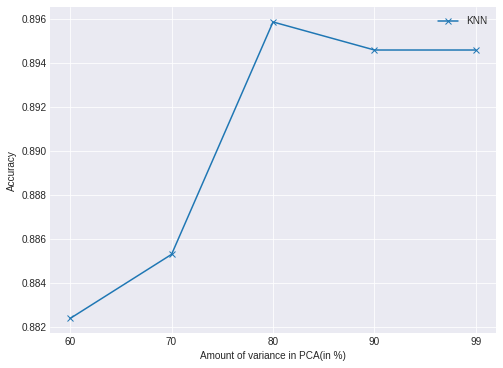

In [ ]:
x=[0,1,2,3,4]
variance_retained=[60,70, 80,90,99]
plt.figure(figsize=(8,6))
plt.plot(knn, label='KNN',marker='x')
plt.xticks(x,variance_retained)
plt.ylabel('Accuracy')
plt.xlabel('Amount of variance in PCA(in %)')
plt.legend()
plt.show()


# **Inference from the computations and the infograph shown above**
* Best accuracy of the KNN is achieved when the data variance is retained from 80% to 99% or in other words number of PCA features chosen are between 25 to 42. 

# **Clustering using DBSCAN**

* eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. Value chosen is 2.
* min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. Value chosen is 50.

In [ ]:
clustering = DBSCAN(eps=2, min_samples=50).fit(X)
print("No of samples in the clusters")
np.unique(clustering.labels_, return_counts=True)

No of samples in the clusters


(array([-1,  0]), array([ 5709, 35467]))

In [ ]:
# Performing tsne transformation on the data for helping in visualisation later
tsne=TSNE(n_components=2, random_state=42,perplexity=40)
X_tsne=tsne.fit_transform(X_std)
labels=np.array(y).reshape(-1,1)
# creating a new data frame which help us in plotting the t SNE transformed data
tsne_data = np.concatenate((X_tsne, labels), axis=1)
tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "GroundTruth Label"))

# **Infograph with results of DBSCAN clustering**

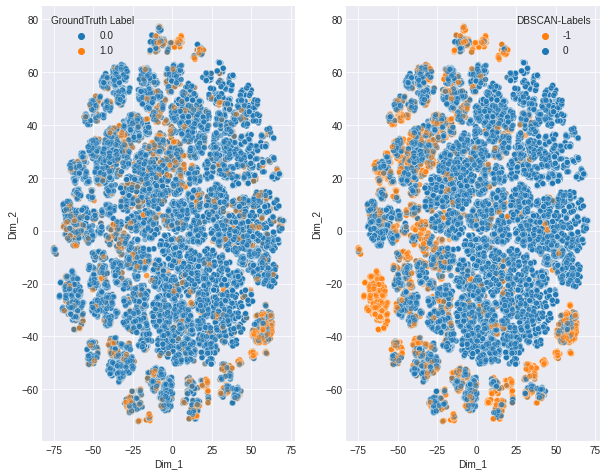

In [ ]:
tsne_df_copy= tsne_df.copy()
tsne_df_copy['DBSCAN-Labels']= clustering.labels_


# Relevant code for plotting the given class labels and cluster labels
colors = sns.color_palette()

modes_gt=tsne_df_copy['GroundTruth Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}

modes_clus=tsne_df_copy['DBSCAN-Labels'].unique()
palette_clus = {mode: color for mode, color in zip(modes_clus, colors)}

plt.figure(figsize = (10, 8))
# plotting tsne for groudtruth labels
ax = plt.subplot(1,2,1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax= ax,hue='GroundTruth Label',palette=palette_gt,alpha=0.5);
# plotting tsne for cluster labels using DBSCAN
ax = plt.subplot(1,2,2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax= ax, hue='DBSCAN-Labels',palette=palette_clus,alpha=0.5);
plt.show()


# **finding intersection between groundtruth based anomalies and anomalies identified by DBSCAN**


In [ ]:
itemindexes_dbclus = np.nonzero(clustering.labels_ == -1)
itemindexes_ygt = np.nonzero(y.values == 1)
common_anom_idx=np.intersect1d(itemindexes_ygt, itemindexes_dbclus)

print(f'No of Anomalies detected: {len(common_anom_idx)} out of {len(itemindexes_ygt[0])} ')
print(f'% of anomalies detected: {(len(common_anom_idx)/(len(itemindexes_ygt[0])))*100}')


No of Anomalies detected: 1409 out of 4639 
% of anomalies detected: 30.372925199396423


In [ ]:
# removing true anomalies from the original data
all_idx_y_test=[i for i in range(len(y))]
updated_idx=np.setdiff1d(np.array(all_idx_y_test), common_anom_idx)
y_mod=y.values[updated_idx]
X_mod=X.values[updated_idx]

# train-test split for retraining the baseline KNN model after removing anomalies from the original data
X_train_dbmod,X_test_dbmod,y_train_dbmod, y_test_dbmod=train_test_split(X_mod, y_mod, test_size=0.4, random_state=42,stratify=y_mod)


knn_dbclus = KNeighborsClassifier()
knn_dbclus.fit(X_train_dbmod,y_train_dbmod)
y_pred_knn_dbclus=knn_dbclus.predict(X_test_dbmod)
acc_knn_dbclus=accuracy_score(y_pred_knn_dbclus,y_test_dbmod)

print('-------Accuracy on BASELINE method-----\n')
print(f'KNN : {acc_knn}\n')

print('-------Accuracy after anomalies removed from DBSCAN----------\n')
print(f'KNN : {acc_knn_dbclus}')


No of Anomalies detected: 1409 out of 4639 
% of anomalies detected: 30.372925199396423
-------Accuracy on BASELINE method-----

KNN : 0.8920526986825329

-------Accuracy after anomalies removed from DBSCAN----------

KNN : 0.9134972024894701


# **Inference drawn**
* After removing the true anomalies identified by the DBSCAN clustering algorithm, the baseline KNN model is retrained.
* The retrained KNN model shows better performance as compared to the baseline KNN model.
* Hence, the model performance improves after treating the anomalies.  

# **Classification using Decision Tree**
* We have been asked to remove the anomalies identified after classification. 
* So in case of classification anomalies have been predicted on the test data and have also been removed from the test data only.
* The performance analysis has been done using the anomaly treated test data.  

In [ ]:
#using decision tree classifier with defult hyperparameter settings
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

y_pred_dt=clf_dt.predict(X_test)

# **Infograph with results of Decision Tree on test data**

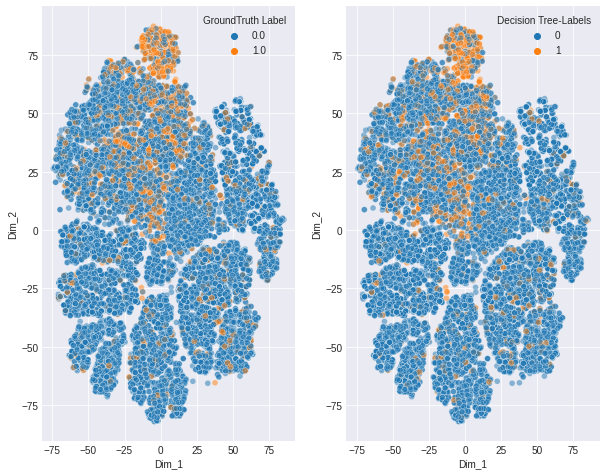

In [ ]:
# Performing tsne transformation on the data for helping in visualisation later
tsne=TSNE(n_components=2, random_state=42,perplexity=40)
X_tsne=tsne.fit_transform(X_test)
labels=np.array(y_test).reshape(-1,1)
# creating a new data frame which help us in plotting the t SNE transformed data
tsne_data = np.concatenate((X_tsne, labels), axis=1)
tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "GroundTruth Label"))

tsne_df_copy= tsne_df.copy()
tsne_df_copy['Decision Tree-Labels']= y_pred_dt


# Relevant code for plotting the given class labels and cluster labels
colors = sns.color_palette()

modes_gt=tsne_df_copy['GroundTruth Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}

modes_clus=tsne_df_copy['Decision Tree-Labels'].unique()
palette_clus = {mode: color for mode, color in zip(modes_clus, colors)}

plt.figure(figsize = (10, 8))
# plotting tsne for groundtruth labels
ax = plt.subplot(1,2,1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax= ax,hue='GroundTruth Label',palette=palette_gt,alpha=0.5);
# plotting tsne for cluster labels using Decision Tree
ax = plt.subplot(1,2,2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax= ax, hue='Decision Tree-Labels',palette=palette_clus,alpha=0.5);
plt.show()

# **finding intersection between groundtruth based anomalies and anomalies identified by Decision Tree**

In [ ]:
itemindexes_y_test = np.nonzero(y_test.values == 1)
itemindexes_ypred_dt = np.nonzero(y_pred_dt == 1)
common_anom_idx=np.intersect1d(itemindexes_ypred_dt, itemindexes_y_test)

print(f'No of anomalies detected: {len(common_anom_idx)} out of {len(itemindexes_y_test[0])} from test data')
print(f'% of anomalies detected: {(len(common_anom_idx)/(len(itemindexes_y_test[0])))*100} from test data')

No of anomalies detected: 999 out of 1856 from test data
% of anomalies detected: 53.82543103448276 from test data


In [ ]:
# removing true anomalies from the original data
all_idx_y_test=[i for i in range(len(y_test))]
updated_idx=np.setdiff1d(np.array(all_idx_y_test), common_anom_idx)
y_test_mod=y_test.values[updated_idx]
X_test_mod=X_test.values[updated_idx]


print('-------Accuracy on BASELINE MODEL--------\n')
print(f'KNN : {acc_knn}')


y_pred_knn_mod=knn_clf.predict(X_test_mod)

print('-------Accuracy after ANOMALIES REMOVED using Decision Tree--------\n')
print(f'KNN : {accuracy_score(y_pred_knn_mod,y_test_mod)}')


-------Accuracy on BASELINE MODEL--------

KNN : 0.8920526986825329
-------Accuracy after ANOMALIES REMOVED using Decision Tree--------

KNN : 0.9273526370217167


# **Inference drawn**
* After removing the true anomalies identified by the Decision Tree algorithm, the baseline KNN model is retrained.
* The retrained KNN model shows better performance as compared to the baseline KNN model.
* Hence, the model performance improves after treating the anomalies in the test data.
* The performance can enhance further if the anomalies can be removed from the training data also but in the present case we only have two classes i.e the normal class and the anomaly class and if the anomaly class is completely removed from the training the data then the classifier model cannot be trained on a single class left in the training data.


# **Some further inferences**
* After removing the anomalies using decision tree, we used the anomaly treated test data and the train data to do a performance analysis using SVC, Decision Tree, KNN, Logistic Regression.
* It was observed that the performance for the normal class (class=0) came out to be best using SVC and Logistic Regression model.
* However surprisingly for the anomaly class the behavior in terms of performance was different than the normal class.
* For the anomaly class the best accuracy was obtained using Decision Tree and hence we used the decision tree as the algorithm of our choice for part (e).
* The summary of the performance of the different models  for the normal class after removing anomalies from test data is given as follows (Code was run separately, only results are reproduced here):  

* No of anomalies detected: 987 out of 1856
* % of anomalies detected: 53.178879310344826
* -------Accuracy of BASELINE MODEL--------
  * SVC : 0.9007953372594256
  * Decision Tree : 0.8918705603788477
  * KNN : 0.9260765704693653
  * Logistic Regression : 0.9094165503005281

* Accuracy after removing anomalies predicted by Decision Tree from test data
  * SVC : 0.9392921725652287
  * Decision Tree : 0.8898217514854043
  * KNN : 0.9263110307414105
  * Logistic Regression : 0.9340609661586153
* It is clear that for the normal class the performance of SVC is the best but the number of anomalies detected is not the best in this case. 